# REDES NEURONALES PRACTICA 3 - 2024
# Estadıstica de trenes de spikes


In [3]:
# Let's start by loading the content of the provided files to understand their structure and data.
# We'll first check the contents of spikes.dat and stimulus.dat

import numpy as np

# File paths
spikes_file_path = './spikes.dat'
stimulus_file_path = './stimulus.dat'

# Load the spikes data (binary: 0 or 1)
spikes_data = np.loadtxt(spikes_file_path)

# Load the stimulus data (time and intensity in dB)
stimulus_data = np.loadtxt(stimulus_file_path)

# Check the dimensions of both files to understand their structure
spikes_data.shape, stimulus_data.shape

((128, 10000), (10001, 2))

The spikes.dat file contains 128 rows and 10,000 columns, where each row represents a different realization, and each column corresponds to a time window of 0.1 milliseconds. The stimulus.dat file contains 10,001 rows and 2 columns, where the first column represents the time (in milliseconds) and the second column contains the intensity of the sound envelope (in decibels).

Now, I'll proceed to calculate the interspike intervals (ISI) from the spike data to create the histogram for 
$P(ISI)$ and calculate the coefficient of variability (CV). ​

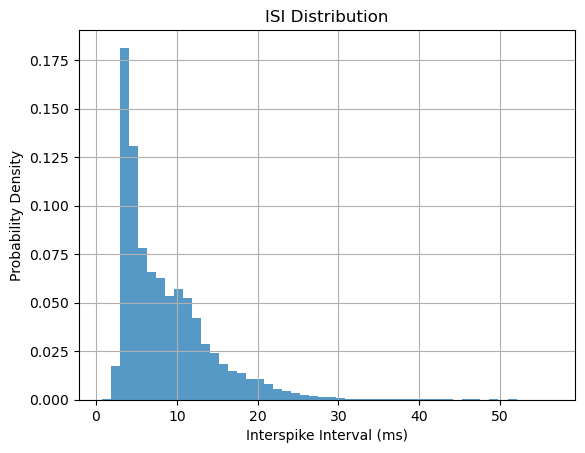

np.float64(0.6572287857646663)

In [4]:
# Calculate the interspike intervals (ISI) for all realizations

# Function to calculate ISIs for a single realization
def calculate_isi(spike_train):
    # Find the indices where spikes occur (spike_train == 1)
    spike_times = np.where(spike_train == 1)[0]
    # Calculate the differences between consecutive spike times (ISI)
    isi = np.diff(spike_times)
    return isi

# Apply the ISI calculation to all realizations and concatenate all ISIs
all_isis = np.concatenate([calculate_isi(spike_train) for spike_train in spikes_data])

# Convert ISIs from indices to milliseconds (each index represents 0.1 ms)
all_isis_ms = all_isis * 0.1

# Calculate the coefficient of variability (CV)
# CV = standard deviation of ISIs / mean of ISIs
mean_isi = np.mean(all_isis_ms)
std_isi = np.std(all_isis_ms)
cv = std_isi / mean_isi

# Plot histogram of ISI distribution and return CV
import matplotlib.pyplot as plt

plt.hist(all_isis_ms, bins=50, density=True, alpha=0.75)
plt.title('ISI Distribution')
plt.xlabel('Interspike Interval (ms)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

cv


The histogram above represents the interspike interval (ISI) distribution $P(ISI)$ for the neuron, considering all realizations. The calculated coefficient of variability (CV) is approximately 0.657, indicating the variability in the spike intervals relative to the mean. ​

## 2
- Obtener un histograma que aproxime la probabilidad P(N) de obtener N spikes en una dada realizaci ́on. Calcular el factor de Fano F. En base a este resultado y al del punto anterior: ¿el proceso de generación de spikes es un proceso tipo renewal?

To calculate the probability distribution $P(N)$ of obtaining $N$ spikes in a given realization, we need to count the number of spikes in each realization. Afterward, we can compute the Fano factor $F$, defined as:
$$
𝐹 = \frac{ \text{variance of } N}{\text{mean of } N}
$$​
 
where $N$ represents the number of spikes in each realization.

Let me proceed with these steps to obtain the histogram for $P(N)$ and calculate the Fano factor.

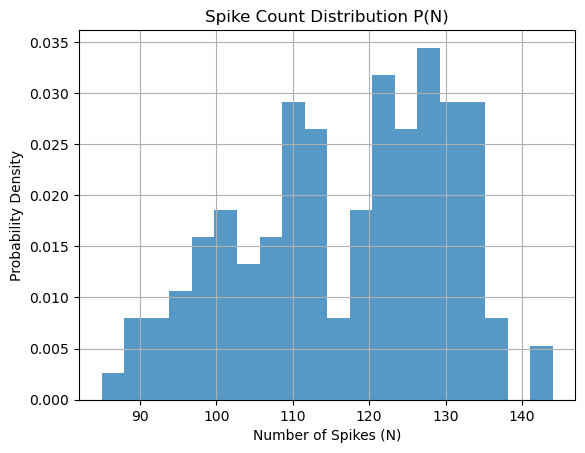

np.float64(1.5656668349803031)

In [5]:
# Calculate the number of spikes (N) in each realization
num_spikes_per_realization = np.sum(spikes_data, axis=1)

# Calculate the Fano factor
mean_spikes = np.mean(num_spikes_per_realization)
var_spikes = np.var(num_spikes_per_realization)
fano_factor = var_spikes / mean_spikes

# Plot histogram for the distribution of spike counts
plt.hist(num_spikes_per_realization, bins=20, density=True, alpha=0.75)
plt.title('Spike Count Distribution P(N)')
plt.xlabel('Number of Spikes (N)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

fano_factor


The histogram above shows the probability distribution $P(N)$, representing the likelihood of observing $N$ spikes in a given realization. The calculated Fano factor $F$ is approximately 1.57.

A Fano factor greater than 1 suggests that the spike generation process exhibits more variability than a Poisson process, where 
$F=1$. Combined with the coefficient of variability (CV) from the previous analysis, this indicates that the spike generation process is not purely renewal. Spike intervals would be independent and identically distributed in a renewal process, such as a Poisson process, and the Fano factor would be close to 1. The observed variability suggests more complex dynamics.








## 3 Estimar la tasa de disparo dependiente del tiempo r(t), promediando todas la realizaciones y usando un tamaño de bin adecuado.

### Estimation of Time-Dependent Firing Rate \( r(t) \)

To estimate the time-dependent firing rate \( r(t) \), we average the spike counts over all realizations in time bins. The firing rate in each bin is calculated as:

$$
r(t) = \frac{1}{N} \sum_{i=1}^{N} \frac{S_i(t)}{\Delta t}
$$

where:
- \( N \) is the total number of realizations (128 in this case),
- \( S_i(t) \) represents the number of spikes in the \( i \)-th realization during the time interval \( \Delta t \),
- \( \Delta t \) is the size of the time bin (in milliseconds).

#### Steps:
1. Choose an appropriate bin size (e.g., 100 ms) for averaging the spike counts over time.
2. For each time bin, sum the spikes across all realizations.
3. Divide the sum by the total number of realizations and the duration of the bin (converted to seconds) to obtain the firing rate in Hz (spikes per second).
4. Plot the time-dependent firing rate \( r(t) \) as a function of time.

This process gives us an approximation of the neuron's firing activity over time based on the stimulus and response data.





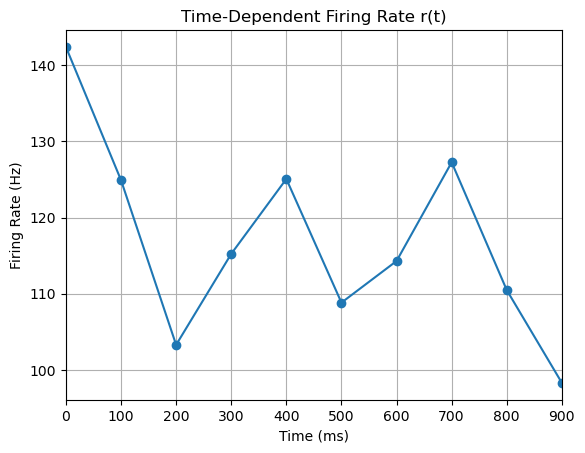

array([142.421875, 124.921875, 103.28125 , 115.234375, 125.078125,
       108.828125, 114.296875, 127.265625, 110.46875 ,  98.28125 ])

In [6]:
# Define the bin size in milliseconds and the corresponding number of time windows
bin_size_ms = 100  # Bin size in ms
bin_size_windows = int(bin_size_ms / 0.1)  # Convert to number of windows (0.1 ms each)

# Initialize the firing rate array
num_bins = spikes_data.shape[1] // bin_size_windows
firing_rate = np.zeros(num_bins)

# Compute the firing rate for each bin
for bin_idx in range(num_bins):
    # Calculate the start and end indices for the current bin
    start_idx = bin_idx * bin_size_windows
    end_idx = start_idx + bin_size_windows
    # Count the spikes across all realizations in the current bin
    firing_rate[bin_idx] = np.sum(spikes_data[:, start_idx:end_idx]) / spikes_data.shape[0] / (bin_size_ms / 1000)  # Convert to Hz

# Time vector for the firing rate
time_vector = np.arange(0, num_bins * bin_size_ms, bin_size_ms)

# Plot the time-dependent firing rate
plt.plot(time_vector, firing_rate, marker='o')
plt.title('Time-Dependent Firing Rate r(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.grid(True)
plt.xlim(0, time_vector[-1])
plt.show()

firing_rate


## 4 Calcular el filtro asociado a esta neurona, que da la mejor prediccion lineal del histograma dependiente del tiempo $r(t)$. Despreciar el tiempo de autocorrelación del estímulo.

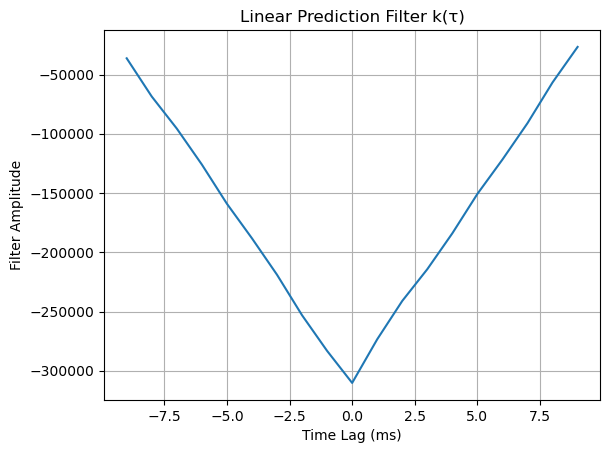

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the stimulus data (time and intensity in dB)
stimulus_data = np.loadtxt('stimulus.dat')
time_stimulus = stimulus_data[:, 0]
stimulus = stimulus_data[:, 1]

# Assuming you have already computed the time-dependent firing rate r(t)
# Replace 'firing_rate' with your previously computed array
# And 'time_vector' with the corresponding time vector for the firing rate

# Ensure both time arrays match in size by trimming or interpolating if necessary
stimulus = stimulus[:len(time_vector)]  # Ensure stimulus and r(t) are of the same length

# Compute the cross-correlation between the stimulus and the firing rate
cross_corr = np.correlate(firing_rate, stimulus, mode='full')

# Normalize by the stimulus variance (power)
stimulus_variance = np.var(stimulus)
filter_k = cross_corr / stimulus_variance

# Time shift vector for the filter (lags)
lags = np.arange(-len(time_vector) + 1, len(time_vector))

# Plot the filter
plt.plot(lags, filter_k)
plt.title('Linear Prediction Filter k(τ)')
plt.xlabel('Time Lag (ms)')
plt.ylabel('Filter Amplitude')
plt.grid(True)
plt.show()
